In [1]:
import numpy as np
import matplotlib.pyplot as plt

#initial values
t_end=10 #[s]
length = t_end*60 #Number of data points
p_current = 0 #[bar]
p_current_noise = 0 #[bar]
freq=1/60 #[s^-1]

In [2]:
#Function that describes the next bar value based on the current measurement (p_current) and the desired value (p_set) as well as the frequency
def valve_behavior(p_set, p_current, frequency):
    T=0.2
    p_actual = p_set*(1-np.exp(-frequency/T))+p_current*np.exp(-frequency/T)
    
    return p_actual

In [3]:
#creates input for multiple impulses
def p_input(length):
    p_set=[]

    for i in range(0,length):
        if i==0:
            p_set.append(0)
        elif 0<i<=0.1*length:
            p_set.append(4)
        elif 0.100*length<i<=0.498*length:
            p_set.append(2.4355)
        elif 0.356*length<i<=0.498*length:
            p_set.append(1.43) 
        elif 0.498*length<i<=0.785*length:
            p_set.append(4.765) 
        elif 0.785*length<i<=length:
            p_set.append(9.2345) 
    return p_set

#creates input for a single impulse of specified amount
def p_input_single_impulse(length, amount):
    p_set=[]

    for i in range(0,length):
        if i==0:
            p_set.append(0)
        elif 0<i<=length:
            p_set.append(amount)
    return p_set

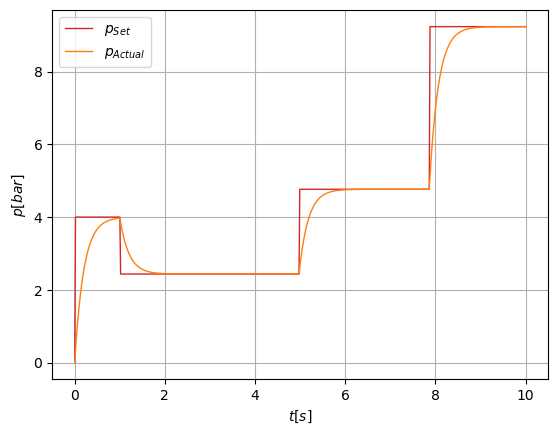

In [4]:
#run input functions
p_set = p_input(length)
noise = np.random.normal(0,0.3, len(p_set))
p_set_noise=p_set+noise
time = np.linspace(0,t_end,length)

#create clear and noisy outputs for p_actual
p_actual = []
p_actual_noise=[]
for i in range(length):
    p_actual_noise.append(valve_behavior(p_set_noise[i], p_current_noise, freq))
    p_actual.append(valve_behavior(p_set[i], p_current, freq))
    p_current_noise=valve_behavior(p_set_noise[i], p_current, freq)
    p_current=valve_behavior(p_set[i], p_current, freq)
  

#plt.plot(time, p_set_noise, label='$p_{Set}$', color='tab:blue', linewidth=1)
plt.plot(time, p_set, label='$p_{Set}$', color='tab:red', linewidth=1)
plt.plot(time, p_actual, label='$p_{Actual}$', color='tab:orange', linewidth=1)
#plt.plot(time, p_actual_noise, label='$p_{Actual}$', color='tab:orange', linewidth=2)
plt.ylabel('$p  [bar]$')
plt.xlabel('$t   [s]$')
plt.legend()
plt.grid(True)
plt.show()

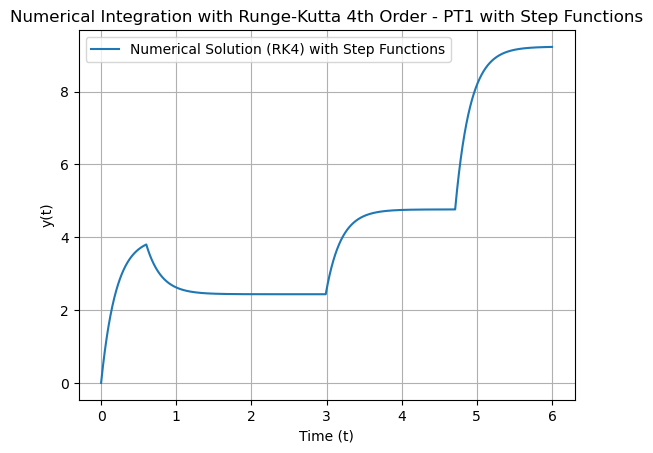

In [5]:
#ODE of the system with Runge-Kutta (Just for verification, probably doesnt give perfect results):

# Define the PT1 system ODE dy/dt = f(t, y, u)
def f(t, y, u):
    tau = 0.2  # Time constant of the PT1 system
    return -y/tau + u/tau

# Runge-Kutta 4th order method for numerical integration with step functions
def runge_kutta_4th_order_with_steps(f, y0, t0, t_end, h, p_set):
    t_values = np.arange(t0, t_end + h, h)
    y_values = []

    y = y0
    for i in range(len(t_values)):
        # Include step functions at specified times
        u = p_set[i]
        y_values.append(y)
        k1 = h * f(t_values[i], y, u)
        k2 = h * f(t_values[i] + h / 2, y + k1 / 2, u)
        k3 = h * f(t_values[i] + h / 2, y + k2 / 2, u)
        k4 = h * f(t_values[i] + h, y + k3, u)
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t_values, np.array(y_values)

def p_input(length):
    p_set=[]

    for i in range(0,length):
        if 0<=i<=0.1*length:
            p_set.append(4)
        elif 0.100*length<i<=0.498*length:
            p_set.append(2.4355)
        elif 0.356*length<i<=0.498*length:
            p_set.append(1.43) 
        elif 0.498*length<i<=0.785*length:
            p_set.append(4.765) 
        elif 0.785*length<i<=length:
            p_set.append(9.2345) 
    return p_set

def p_input_single_impulse(length):
    p_set=[]

    for i in range(0,length):
        if i==0:
            p_set.append(0)
        elif 0<i<=length:
            p_set.append(7)
    return p_set

# Initial conditions
t0 = 0
t_end = 6
y0 = 0  # Initial value for y at t0
h = 0.001
p_set=p_input(len(np.arange(t0, t_end + h, h)))
noise = np.random.normal(0,0.5, len(p_set))
#p_set=p_set+noise

# Define step times
step_times = [2.0, 4.0, 6.0]

# Numerically integrate using Runge-Kutta 4th order method with step functions
t_values, y_values = runge_kutta_4th_order_with_steps(f, y0, t0, t_end, h, p_set)

# Plot the results
plt.plot(t_values, y_values, label='Numerical Solution (RK4) with Step Functions')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Numerical Integration with Runge-Kutta 4th Order - PT1 with Step Functions')
plt.legend()
plt.grid(True)
plt.show()